In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dogs = pd.read_csv('../datasets/dogs.csv')

In [3]:
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


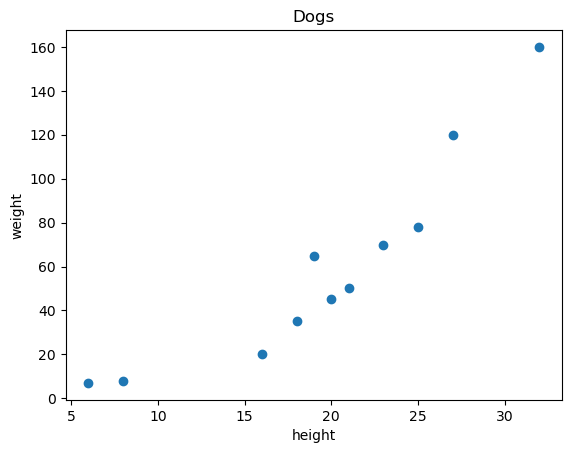

In [4]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Dogs')
plt.show()

In [5]:
feature_names = dogs.columns[1:]

In [6]:
feature_names

Index(['height', 'weight'], dtype='object')

In [7]:
X = dogs[feature_names]

In [8]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [12]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [15]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

In [17]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

In [18]:
X[kmeans.labels_ == 0]

,height,weight
3,0.807692,0.738562
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000


In [19]:
X[kmeans.labels_ == 1]

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
4,0.076923,0.006536
8,0.576923,0.281046
9,0.500000,0.379085
10,0.000000,0.000000


In [20]:
kmeans.cluster_centers_

array([[0.79807692, 0.65359477],
       [0.36263736, 0.16900093]])

In [21]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [22]:
centers

,height,weight
0,0.798077,0.653595
1,0.362637,0.169001


In [23]:
kmeans.inertia_

0.732128510026434

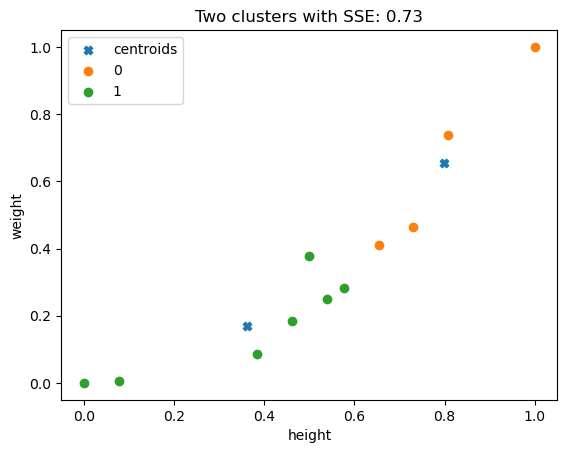

In [24]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.title(f'Two clusters with SSE: {round(kmeans.inertia_, 2)}')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import silhouette_samples

In [26]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [27]:
silhouette_values

array([0.43838016, 0.60941263, 0.57018981, 0.55642193, 0.57654584,
       0.31689847, 0.02088641, 0.49092545, 0.30420853, 0.21612362,
       0.54509422])

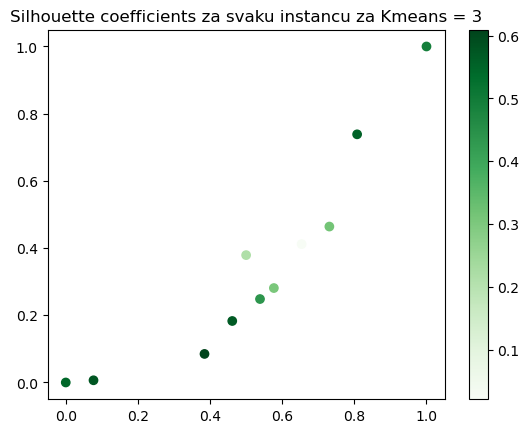

In [28]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficients za svaku instancu za Kmeans = 3')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

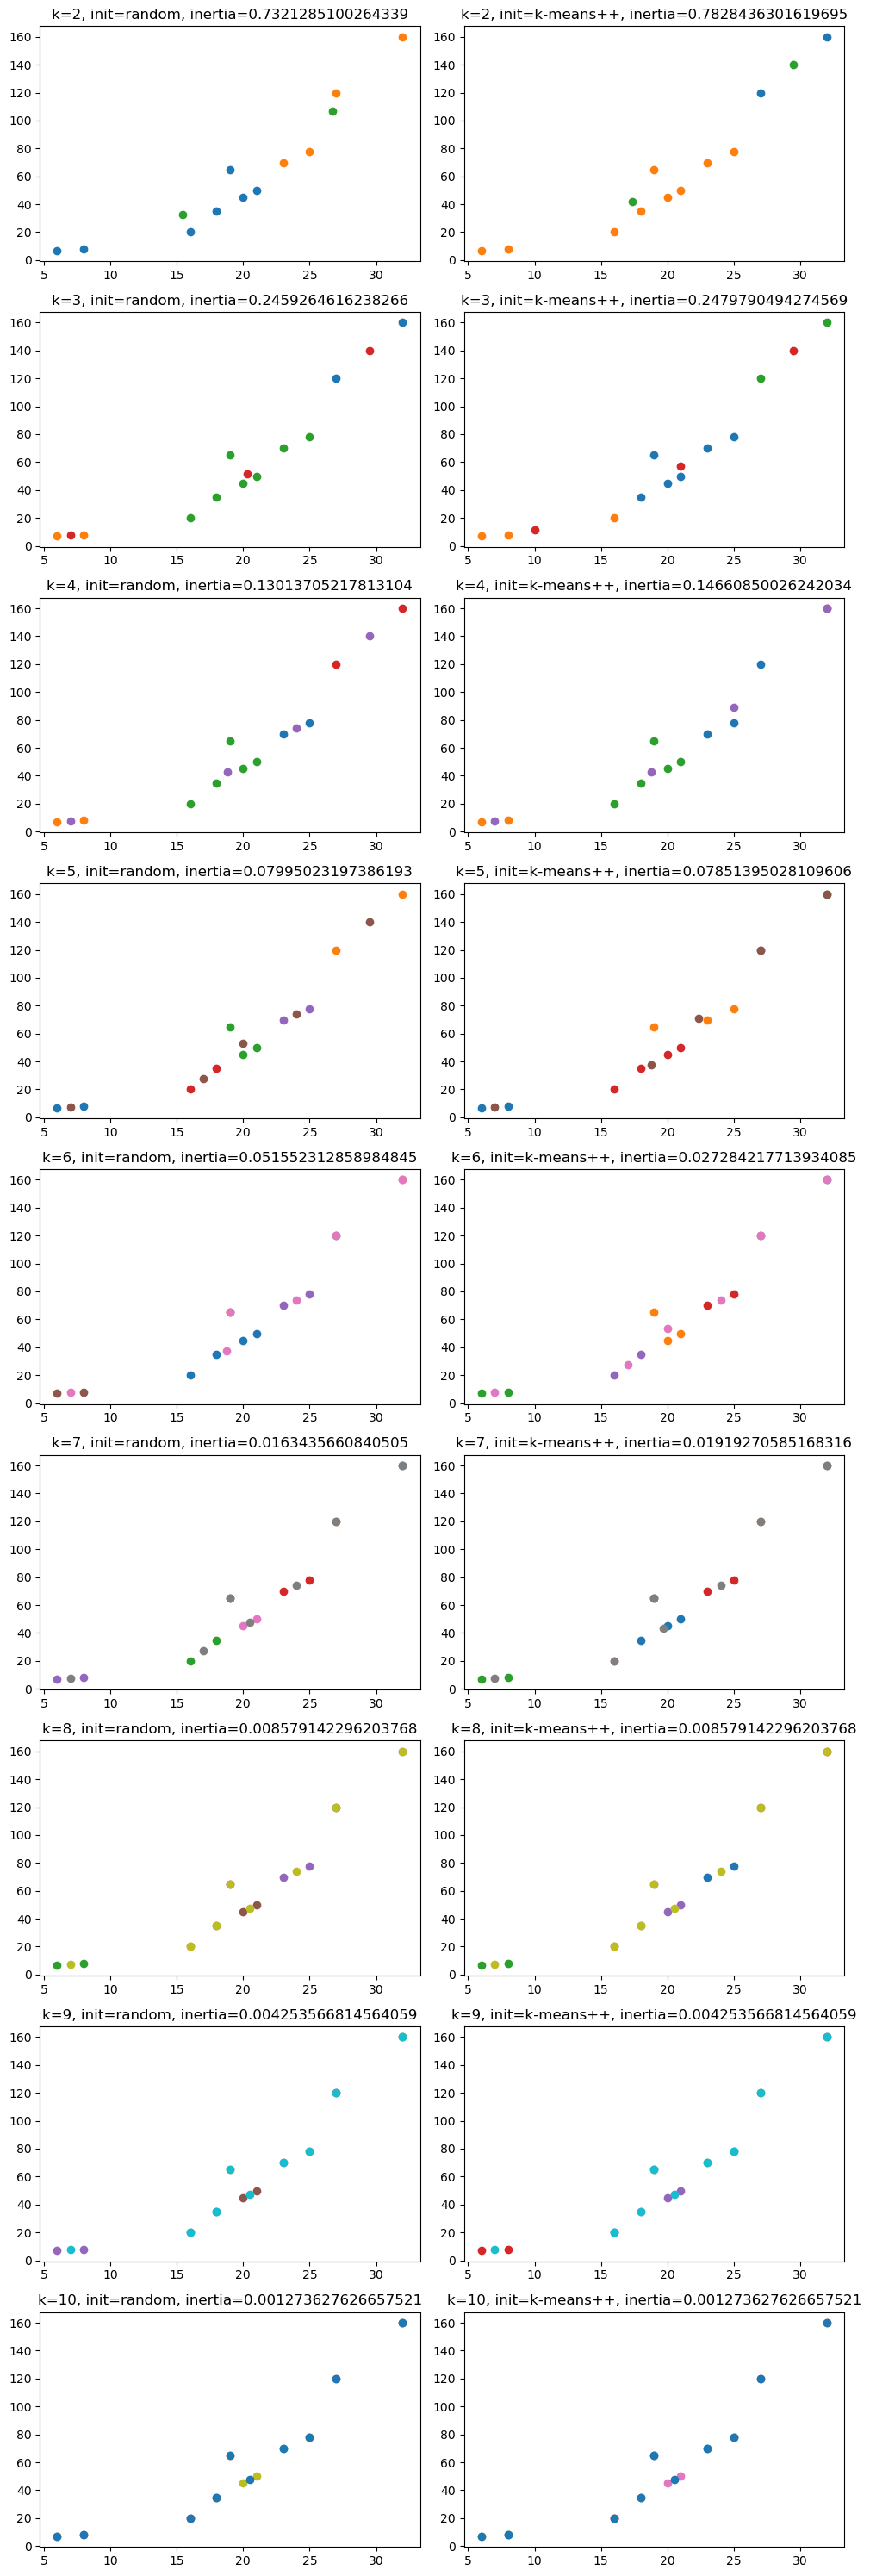

In [30]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))
            
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in range(k):
            elems = dogs[kmeans.labels_ == label]
            plt.scatter(elems['height'], elems['weight'])
            
        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'])
        
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

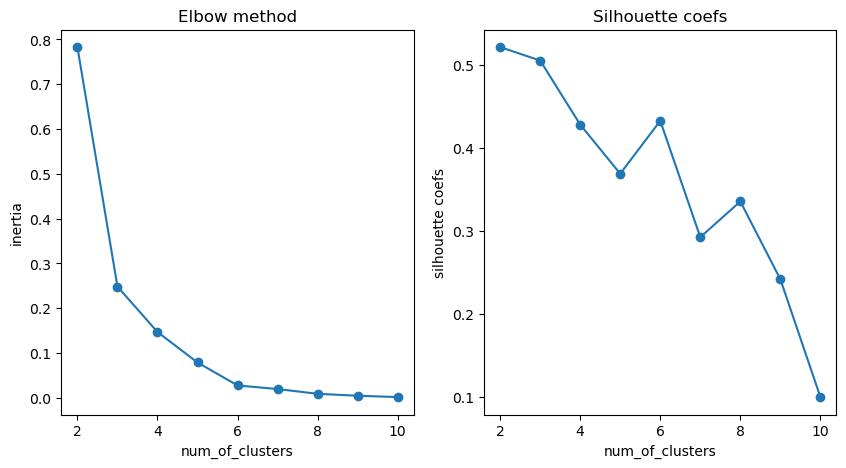

In [31]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [32]:
import matplotlib.cm as cm

For n_clusters=  2 The average silhouette_score is:  0.5210272444296898
For n_clusters=  3 The average silhouette_score is:  0.5813924452451538
For n_clusters=  4 The average silhouette_score is:  0.4276472724830383
For n_clusters=  5 The average silhouette_score is:  0.42356634638256535


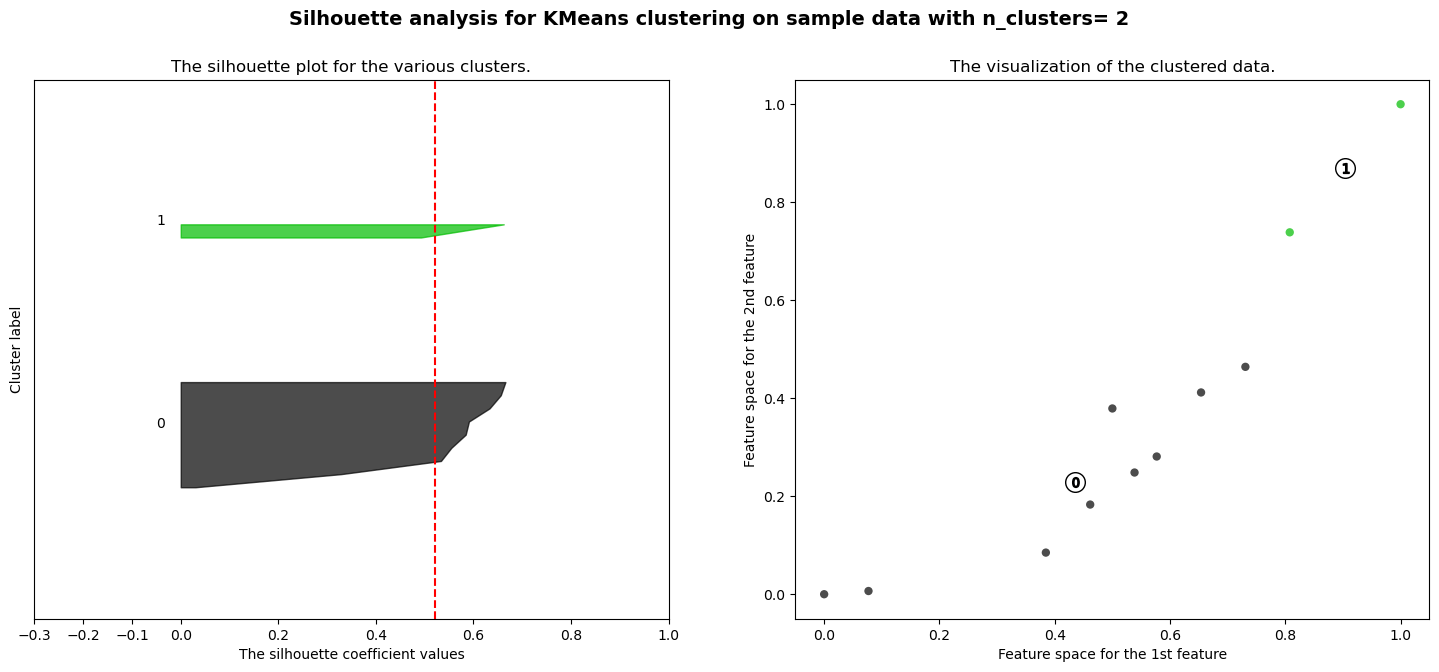

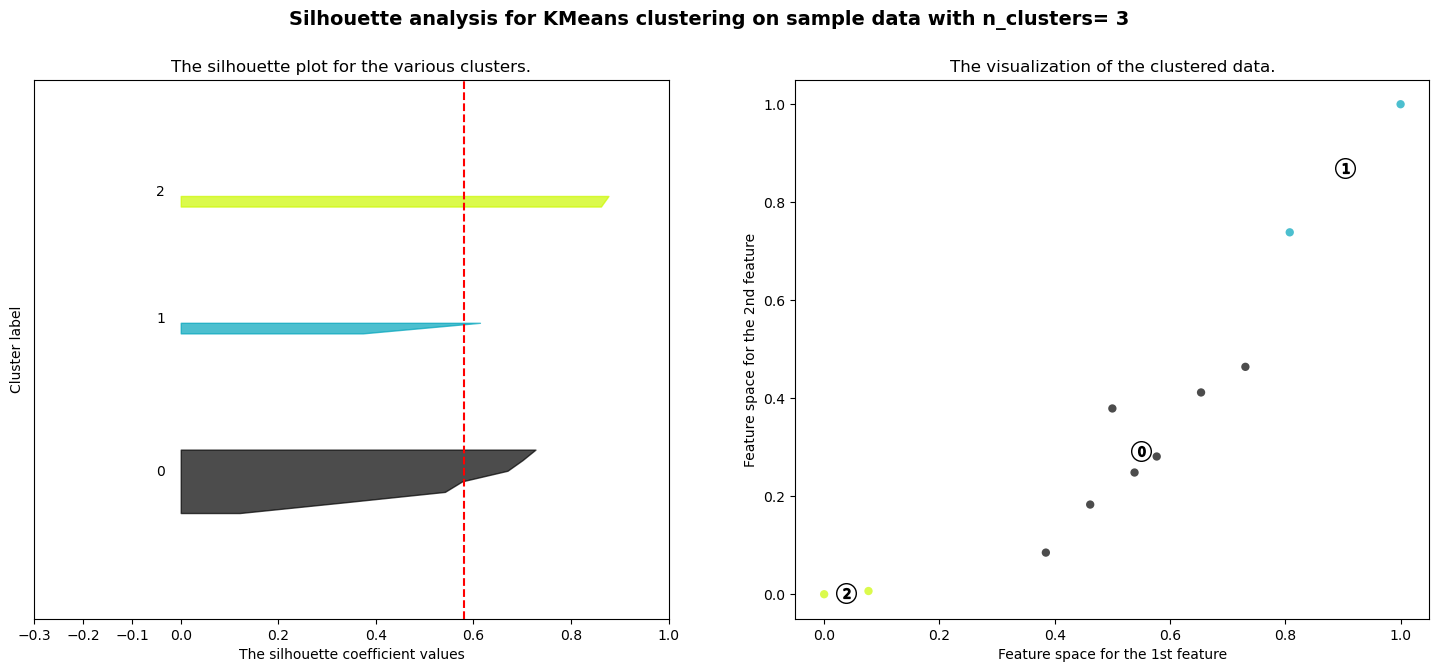

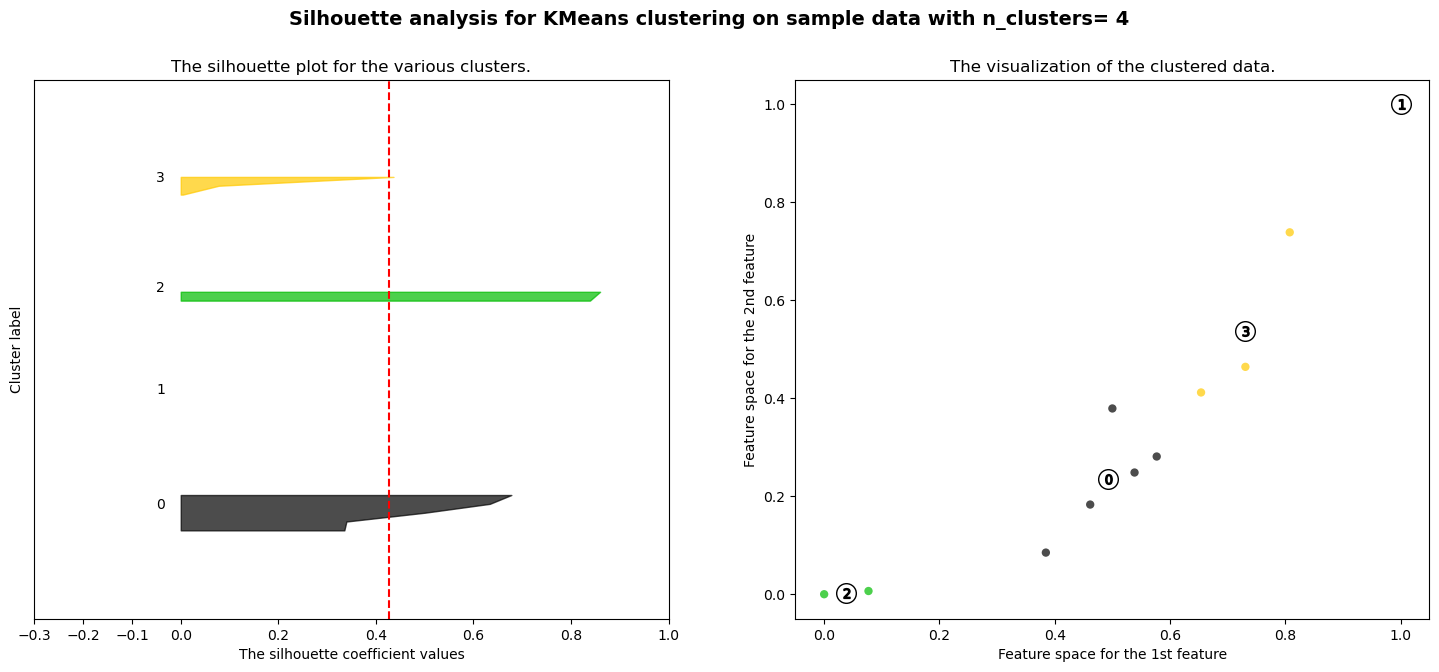

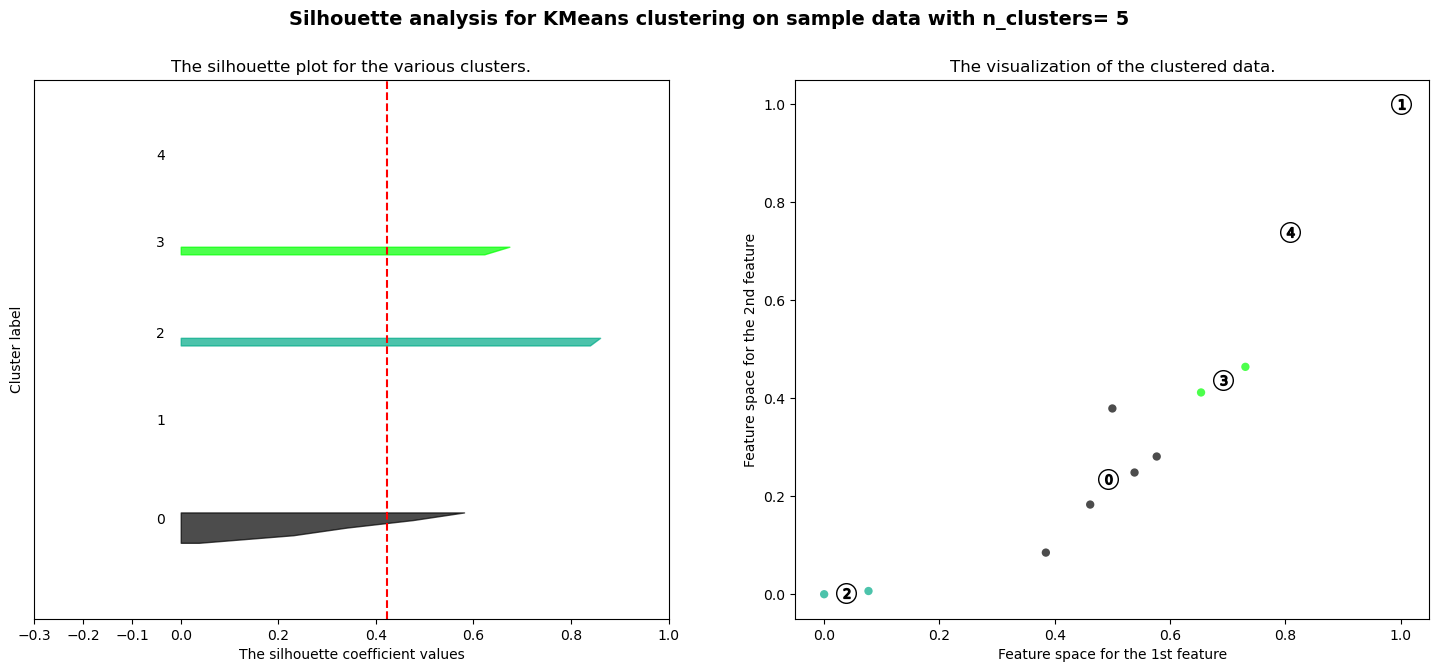

In [33]:
for n_clusters in [2,3,4,5]:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1)*10])
    
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouetter_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters= ', n_clusters, 
         'The average silhouette_score is: ', silhouetter_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
                                                             
    ax1.axvline(x=silhouetter_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X['height'], X['weight'], marker='o', lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker='o', c='white', alpha=1,
               s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$'%i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    
    plt.suptitle(
    'Silhouette analysis for KMeans clustering on sample data with n_clusters= %d' % n_clusters,
    fontsize=14, fontweight='bold')
    
plt.show()

In [34]:
# kompresija slike

In [35]:
from matplotlib.image import imread
import seaborn as sns

In [36]:
img = imread('../datasets/masa.jpg')

In [37]:
img_size = img.shape

In [38]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [39]:
km = KMeans(n_init='auto', n_clusters=30)

In [40]:
km.fit(X_img)

KMeans(n_clusters=30)

In [41]:
X_comp = km.cluster_centers_[km.labels_]

In [42]:
X_comp = np.clip(X_comp.astype('uint8'), 0, 255)

In [43]:
X_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

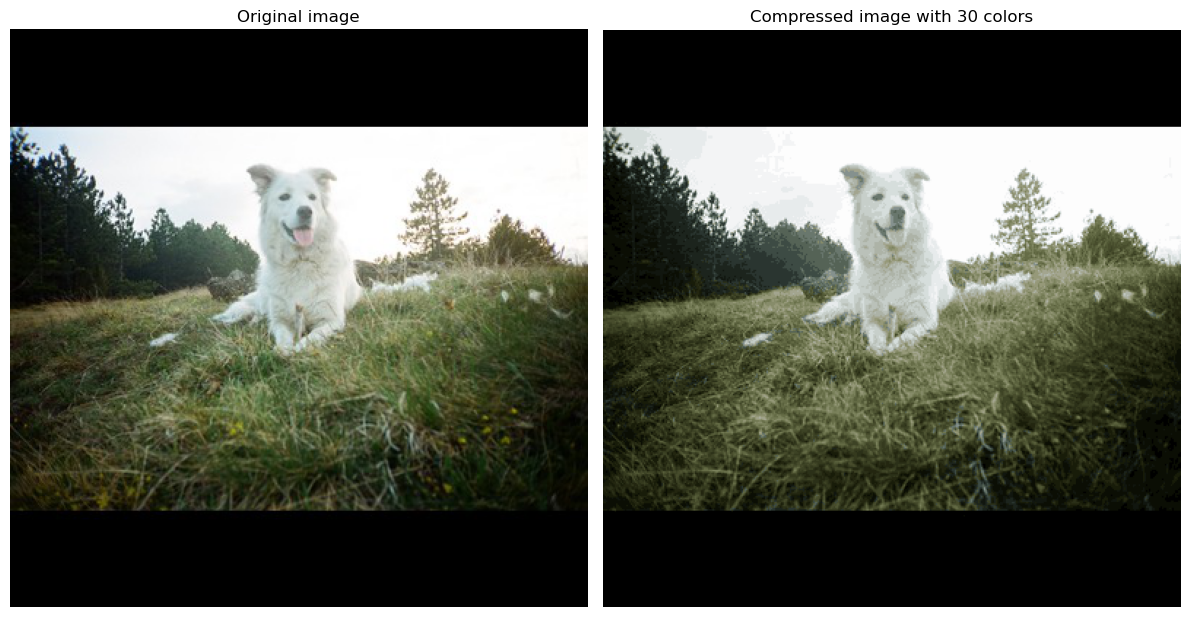

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_comp)
ax[1].set_title('Compressed image with 30 colors')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

In [45]:
from sklearn.cluster import BisectingKMeans

In [46]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [50]:
def visuelize_clustering(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:,0], centers[:,1], marker='X', label='centroids', color='black')
    
    for c in np.unique(labels):
        elems = X[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)
        
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{alg_name} {len(centers)} clusters')
    plt.legend()
    plt.show()

In [48]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

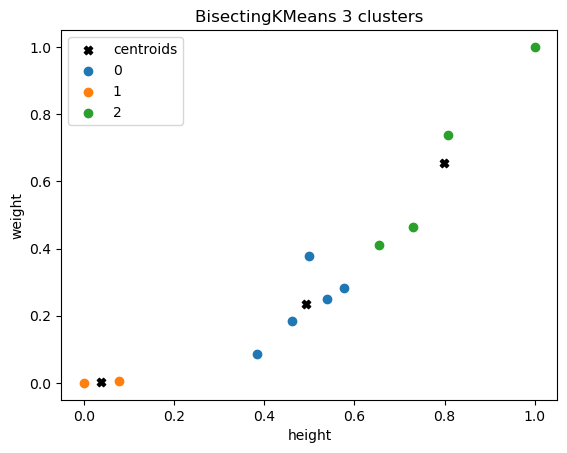

In [51]:
visuelize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, 'BisectingKMeans')

In [52]:
from fcmeans import FCM

In [53]:
fcm = FCM(n_clusters=3, m=3)

In [54]:
fcm.fit(X.to_numpy())

In [55]:
labels = fcm.predict(X.to_numpy())

In [56]:
centers = fcm.centers

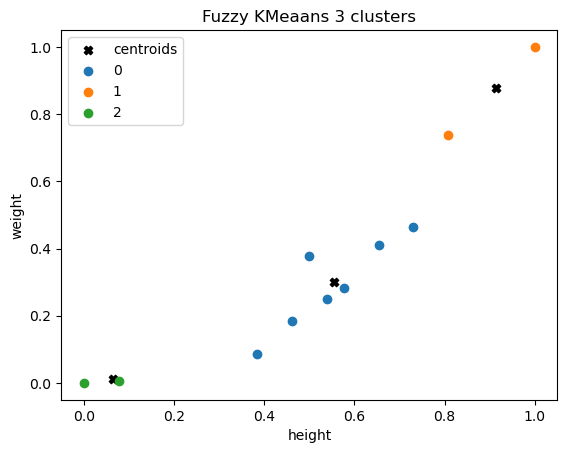

In [57]:
visuelize_clustering(X, fcm.centers, fcm.predict(X.to_numpy()), X.columns, 'Fuzzy KMeaans')

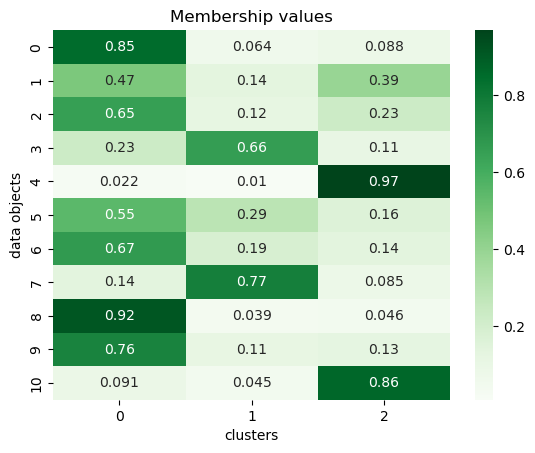

In [58]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()